In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
## Importing all data trough pandas 
data1 = pd.read_table("cyclopentanone_pbe0_6311pgs_n512_gauss0.05.nm.tsv")
data2 = pd.read_table("pinacolone_pbe0_6311pgs_n256_gauss0.05.nm.tsv")
actFlux = pd.read_csv("StandardActinicFluxes.csv")

In [3]:
## Data: Energy / nm, Intensity / cm2
## Actflux: Wavelength / nm, Flux / quanta.cm-2.s-

In [4]:
## Converting into numpy arrays
wc = actFlux["wc"].to_numpy()
lowFlux = actFlux["L90_500"].to_numpy()
medFlux = actFlux["M60_350"].to_numpy()
highFlux = actFlux["H0_200"].to_numpy()
wavelength_cyclo, wavelength_pina = np.flip(data1["# Energy / nm"].to_numpy()), np.flip(data2["# Energy / nm"].to_numpy())
intensity_cyclo, intensity_pina = np.flip(data1["Intensity / cm^2 per molecule"].to_numpy()), np.flip(data2["Intensity / cm^2 per molecule"].to_numpy())

In [12]:
## Exploratory plotting 
# fig, ax = plt.subplots(1,2, figsize = (15,7))
# fig2, ax2 = plt.subplots(1,3, figsize = (15,7))

# ax[0].scatter(x= wavelength_cyclo,y=intensity_cyclo)
# ax[1].scatter(x= wavelength_pina,y=intensity_pina)

# ax2[0].scatter(x= wc, y = lowFlux)
# ax2[1].scatter(x= wc, y = medFlux)
# ax2[2].scatter(x= wc, y = highFlux)

In [6]:
## interpolating values both onto round numbers

x_max_flux = np.floor(wc.max())
x_min_flux = np.floor(wc.min())

x_min_wavelength = np.floor(wavelength_pina.min())
x_max_wavelength = np.floor(wavelength_cyclo.max())

#x_vals = np.arange(x_min_flux,x_max_flux,1)
x_vals = np.arange(x_min_wavelength,x_max_flux,1)
x_vals

low_flux_interp = np.interp(x_vals, wc, lowFlux)
med_flux_interp = np.interp(x_vals, wc, medFlux)
high_flux_interp = np.interp(x_vals, wc, highFlux)


intensity_cyclo_interp = np.interp(x_vals, wavelength_cyclo, intensity_cyclo)
intensity_pina_interp = np.interp(x_vals, wavelength_pina, intensity_pina)

## Multiplying distributions 

q_yield = 1 

j_components_cyclo = intensity_cyclo_interp*high_flux_interp*q_yield
j_components_pina = intensity_pina_interp*high_flux_interp*q_yield

In [7]:
## interpolating values onto cross section wavelengths and multiplying distributions

def calc_j_components(flux_wav, flux_int, mol_wav, mol_int, q_yield):
    
    flux_interp = np.interp(mol_wav,flux_wav,flux_int)
    
    j = flux_interp*mol_int*q_yield
    
    return mol_wav, j

In [9]:
wav, j_comp = calc_j_components(wc, highFlux, wavelength_cyclo,intensity_cyclo,1)

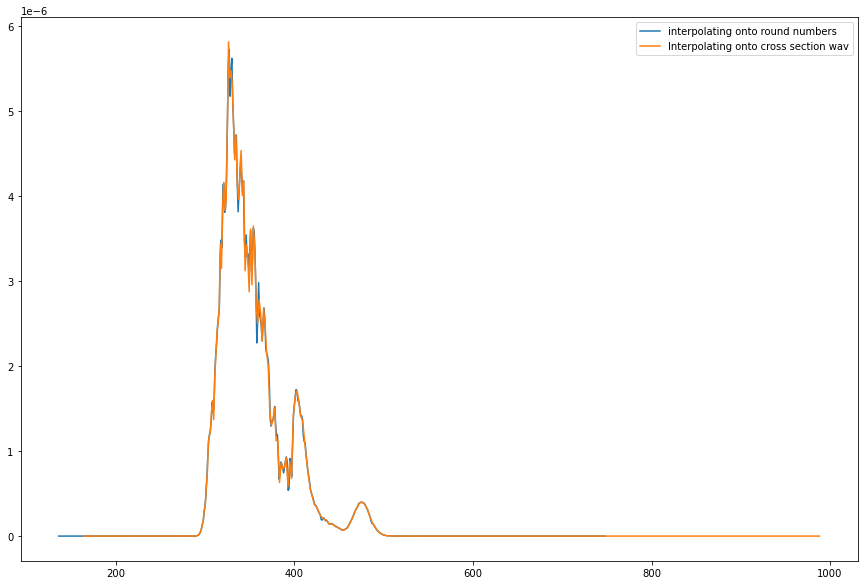

In [11]:
fig,ax = plt.subplots(1,1,figsize=(15,10))

ax.plot(x_vals,j_components_cyclo, label = "interpolating onto round numbers")
ax.plot(wav,j_comp, label = "Interpolating onto cross section wav")
ax.legend()
plt.show()